In [39]:
%matplotlib inline

In [40]:
%run Test.py

Analytical Foreground

In [ ]:
l = np.arange(2000)
y = np.arange(3500)

Santos:
https://arxiv.org/pdf/astro-ph/0408515.pdf

In [ ]:
A = 6.6*10**-3 #K^2
nu_21 = 1420. # MHz
nu_c = 600. # MHz
nu_l = 400. # MHz
nu_r = 800. # MHz
nu_lower_bound = 200. ; nu_upper_bound = 1000. # MHz
n_y= 2000 # number of frequency channels- half of these within HIRAX bandwidth
beta = 2.8 # SHAW # SANTOS 2.8 # spec index from Santos et al 2005
xi = 4  # SHAW # SANTOS 4.0 # spec index variance from Santos et al 2005
alpha = 2.8
N = 1
nu = np.linspace(nu_l,nu_2, n_y)
nu_tilde = np.linspace((nu_lower_bound-nu_c)/nu_21, (nu_upper_bound-nu_c)/nu_21, n_y)
nu_tilde_prime = nu/ nu_21


In [ ]:
cl = np.empty(l.size, y.size)

In [41]:
import numpy as np
## Y MODES- Radial wave number
n_y= 2000 # (Number of frequency  channels)half of these go into final output
nu_21 = 1420. # MHz Resting Frequency of 21 cm line
nu_c = 600. # MHz Center frequency
nu_l = 400. # MHz Left frequency limit
nu_r = 800. # MHz Right frequency limit

beta_freq = 2.8 # SHAW # SANTOS 2.8 # spec index from Santos et al 2005
xi = 4.0 # SHAW # SANTOS 4.0 # spec index variance from Santos et al 2005


nu_lower_bound = 200. #MHz
nu_upper_bound = 1000. # MHz

nu_tilde=np.linspace((nu_lower_bound-nu_c)/nu_21, (nu_upper_bound-nu_c)/nu_21, n_y)
nu_c_tilde = nu_c / nu_21 #Normalised centre frequency with rest frequency of 21 cm 
nu_l_tilde = nu_l/nu_21 #Normalised left frequency limit with rest freq of 21 cm 
indices_left = np.where(nu_tilde < (nu_l-nu_c)/nu_21)
indices_right = np.where(nu_tilde > (nu_r-nu_c)/nu_21)

galspec_nu = (nu_c_tilde*(nu_c_tilde + nu_tilde))**(-beta_freq)*np.exp(-1.0/(2.0*xi**2)*np.log(1.0+nu_tilde/nu_c_tilde )**2)
galspec_nu[indices_left] =0. 
galspec_nu[indices_right] =0.

taper = np.cos(nu_tilde/((nu_r-nu_c)/nu_21)*np.pi/2)**4

d=((nu_r-nu_l)/nu_21)/n_y
y_arr_negpos=np.fft.fftfreq(n_y,d)

galspec_y_negpos=np.abs(np.fft.fft(galspec_nu)*d)
galspec_y_taper_negpos=np.abs(np.fft.fft(taper * galspec_nu)*d)
taper_y_negpos = np.abs(np.fft.fft(taper)*d)

y_arr=y_arr_negpos[1:int(n_y/2)]
galspec_y=galspec_y_negpos[1:int(n_y/2)]
galspec_y_taper=galspec_y_taper_negpos[1:int(n_y/2)]

## ELL MODES - Angular wave number
n_ell =  50
ell_max = 2000.0
ell_min = 2 # 40.0
ell_arr=np.linspace(ell_min,ell_max,n_ell)
ell_norm = 100. # SHAW # SANTOS 1000.
alpha_ell = 2.8 # SHAW # SANTOS 2.4 # ell index from Santos et al 2005
nu_norm_model = 408.0 # SHAW # SANTOS 130.0
nu_amp_model = 6.6  # SHAW # SANTOS 700.0 # mk^2 (A)

gal_amplitude = nu_amp_model * (nu_21/nu_norm_model)**(-2.0*beta_freq)  # from Santos et al 2004 at nu = 130 - scale to nu_21 used here
galspec_ell = gal_amplitude * (ell_arr/ell_norm)**(-alpha_ell)
galspec = np.outer(galspec_ell, galspec_y_taper)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = ell_arr
Y = y_arr
X, Y = np.meshgrid(X, Y)
Z = galspec

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

plt.show()

In [ ]:
import matplotlib
matplotlib.axes.Axes.imshow
matplotlib.pyplot.imshow
matplotlib.artist.Artist.set_clip_path
matplotlib.patches.PathPatch
fig, ax = plt.subplots()
#im = ax.imshow(Z, interpolation='bilinear')
im = ax.imshow(Z, interpolation='bilinear')

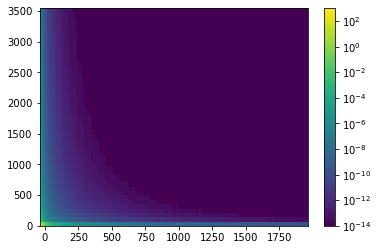

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LogNorm
#plt.figure()

dx = ell_arr[1] - ell_arr[0]
dy = y_arr[1] - y_arr[0]
xc = ell_arr - dx
yc = y_arr - dy
fig, ax = plt.subplots()
im = ax.pcolorfast(xc, yc, Z, norm=LogNorm(vmin=1e-14, vmax=1e3))
#im = plt.imshow(np.log10(Z), origin='lower',
                #extent=[ell_arr[0], ell_arr[-1], y_arr[0], y_arr[-1]])
#ax.set_xticklabels(ell_arr)
#ax.set_xlim([np.min(ell_arr), np.max(ell_arr)])
#ax.set_xscale('linear')
fig.colorbar(im)
#plt.colorbar()
#plt.show()

In [147]:
#from astropy.constants import h

In [ ]:
h = 0.67 #Dimensionless hubble parameter

In [ ]:
from astropy.cosmology import WMAP9 as cosmo
H0 = (cosmo.H(0)).value #
h = h.value

In [ ]:
z1 = (nu_21-nu_l)/nu_l
z2 = (nu_21-nu_r)/nu_r
z_bar = (nu_21-nu_c)/nu_c
a_bar = 1/(1+z_bar)

In [ ]:
Hz = H0*cosmo.efunc(z_bar) #Hubble parameter
Omega_H1 = 1e-3


In [ ]:
Tb_z_bar =  0.566*h*(H0/Hz)*(Omega_H1/0.003)*(1+ z_bar)*(1+ z_bar)
Tb_z_bar =  0.566*h*(cosmo.inv_efunc(z_bar))*(Omega_H1/0.003)*(1+ z_bar)*(1+ z_bar)
Tb_z_bar
#D = (5*)

In [152]:
from astropy.cosmology import WMAP9 as cosmo
H0 = (cosmo.H(0)).value #
h = h.value

In [153]:
z1 = (nu_21-nu_l)/nu_l
z2 = (nu_21-nu_r)/nu_r
z_bar = (nu_21-nu_c)/nu_c
a_bar = 1/(1+z_bar)

In [160]:
Hz = H0*cosmo.efunc(z_bar) #Hubble parameter
Omega_H1 = 1e-3


In [161]:
Tb_z_bar =  0.566*h*(H0/Hz)*(Omega_H1/0.003)*(1+ z_bar)*(1+ z_bar)
Tb_z_bar =  0.566*h*(cosmo.inv_efunc(z_bar))*(Omega_H1/0.003)*(1+ z_bar)*(1+ z_bar)
Tb_z_bar
#D = (5*)

0.33324577735113464

1.0